# Project tasks

- Please rename this file so that you know which copy you have been working in. Keep a copy safe (especially if you are working in the online Jupyter service). You can download a copy by choosing -File- then -Download as- Notebook from the menu above. 
- These tasks are intended to be open-ended, use the questions as a guide, but **you should further investigate the datasets** to answer other interesting questions about them.

---

In [1]:
# Global import
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib import pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from math import sin, cos, sqrt, atan2, radians
from itertools import chain
import string, re

## Task 1 - Edinburgh cycle hire data

The first task is to investigate the dataset in the file `bikes_October18.csv` which contains anonymised data for all trips taken in October 2018 with the Edinburgh Cycle Hire bikes (found [here](https://edinburghcyclehire.com/open-data/historical)). This dataset is kindly supplied for use by Edinburgh Cycle Hire under the [Open Government License (OGL) v3.0](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/).

- What is the average journey time and distance of bike trips which started on a Tuesday?
- How many stations appear in the dataset? Which were the most common starting stations? Think about how to display/plot the results of your analysis.
- What was the most common time(s) of day for journeys to be undertaken?
- Can you process the geographic information (latitudes and longitudes of start and end stations), and display this in an interesting way?
- Can you use the data to answer any other interesting questions about the bike trips?

Please include all the code used to generate your answer and plots, and remember to investigate beyond the initial scope of the questions.

In [2]:
# Read in the bike data
bike_df = pd.read_csv('bikes_October18.csv')
bike_df.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2018-10-01 01:21:40.555000+00:00,2018-10-01 01:26:57.840000+00:00,317,259,St Andrew Square,North East corner,55.954749,-3.192774,262,Canonmills,near Tesco's,55.962804,-3.196284
1,2018-10-01 04:44:47.775000+00:00,2018-10-01 04:47:27.430000+00:00,159,254,Kings Building 3,Kings Building House,55.923479,-3.175385,254,Kings Building 3,Kings Building House,55.923479,-3.175385
2,2018-10-01 04:45:03.548000+00:00,2018-10-01 05:14:10.466000+00:00,1746,254,Kings Building 3,Kings Building House,55.923479,-3.175385,265,Meadows East,Melville Terrace,55.939809,-3.182739
3,2018-10-01 04:53:03.261000+00:00,2018-10-01 04:58:42.537000+00:00,339,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,254,Kings Building 3,Kings Building House,55.923479,-3.175385
4,2018-10-01 05:01:40.443000+00:00,2018-10-01 05:15:36.416000+00:00,835,252,Kings Buildings 1,Grant Institute,55.924185,-3.173831,265,Meadows East,Melville Terrace,55.939809,-3.182739


In [3]:
# Adjust the time format
bike_df.started_at = bike_df.started_at.astype('datetime64[ns]')
bike_df.ended_at = bike_df.ended_at.astype('datetime64[ns]')

#### Q1. What is the average journey time and distance of bike trips which started on a Tuesday?

In [4]:
# Find the Tuesdays
bike_df_tuesday = bike_df[bike_df.started_at.dt.dayofweek==1]

In [5]:
# Average journey time on Tuesday
aver_trip_time = np.mean(bike_df_tuesday.duration)
print('The average journey time of bike trips started on Tuesdays is:', round(aver_trip_time/60,2), 'mins')

The average journey time of bike trips started on Tuesdays is: 22.81 mins


In [6]:
def dist(bike_df):
    '''
    This function is to compute the distance of input trip using ‘Haversine’ formula
    '''
    # Approximate radius of earth in km
    R = 6373.0
    
    # Use the ‘Haversine’ formula to calculate the great-circle distance between two points
    dlat = bike_df.start_station_latitude.apply(radians) - bike_df.end_station_latitude.apply(radians) 
    dlon = bike_df.start_station_longitude.apply(radians) - bike_df.end_station_longitude.apply(radians) 
    a = dlat.apply(lambda x: sin(x/2)**2) + bike_df.start_station_latitude.apply(radians).apply(cos) \
        * bike_df.end_station_latitude.apply(radians).apply(cos) * dlon.apply(lambda x: sin(x/2)**2)
    c = a.apply(lambda x: 2 * atan2(sqrt(x), sqrt(1 - x)))   
    distance = R * c
    
    return distance

# Distance of bike trips which started on Tuesday 
print('The average journey distance of bike trips on Tuesdays is:', round(np.mean(dist(bike_df_tuesday)),4), 'km')

# We can also investigate the average journey distance of overall bike trips:
print('The average journey distance of total bike trips:', round(np.mean(dist(bike_df)),4), 'km')

The average journey distance of bike trips on Tuesdays is: 1.6765 km
The average journey distance of total bike trips: 1.6573 km


#### Q2. How many stations appear in the dataset? 

In [7]:
# Count the stations
station_count = len(bike_df.start_station_name.unique())
print('There are {num} stations appear in the dataset'.format(num=station_count))

There are 31 stations appear in the dataset


#### Q: Which were the most common starting stations?

In [8]:
# print the starting stations in order of usage times
print(bike_df.start_station_name.value_counts())

Bristo Square              299
Fountainbridge             275
George Square              240
Meadows East               215
Canonmills                 204
St Andrew Square           201
Lauriston Place            189
Portobello                 188
Brunswick Place            174
Charlotte Square           160
Victoria Quay              157
Pollock Halls              147
Stockbridge                130
Royal Commonwealth Pool    116
Kings Building 3           116
Waverley Bridge            112
Riego Street               108
Leith Links                100
Shrubhill                   99
City Chambers               84
Kings Building 2            71
Waverley Station            71
St Andrews House            55
Waverley Court              53
Victoria Park               53
Ocean Terminal              47
Castle Street               34
Waitrose, Comely Bank       33
Kings Buildings 1           28
Bruntsfield                 23
Kings Buildings 4           17
Name: start_station_name, dtype: int64


In [9]:
# print the most common ending stations
print(bike_df.end_station_name.value_counts())

Canonmills                 285
Victoria Quay              278
Fountainbridge             253
Brunswick Place            230
George Square              222
Portobello                 201
Meadows East               195
Stockbridge                187
Shrubhill                  181
Bristo Square              174
St Andrew Square           162
Leith Links                139
Waverley Bridge            129
Pollock Halls              122
Charlotte Square           121
Lauriston Place            107
Riego Street               100
Kings Building 2            85
Ocean Terminal              82
Royal Commonwealth Pool     80
Kings Building 3            72
Victoria Park               67
Waitrose, Comely Bank       57
Waverley Station            55
City Chambers               53
Waverley Court              50
St Andrews House            43
Kings Buildings 1           27
Castle Street               24
Bruntsfield                 14
Kings Buildings 4            4
Name: end_station_name, dtype: int64


- We can see, Bristo Square, Fountainbridge and George Square are the most popular starting stations. 
- On the other hand, Canomills, Victoria Quay and Fountainbridge are the most common ending stations. 
- Kings Building 4 has the fewest visitors.

#### Q: Think about how to display/plot the results of your analysis.

- I think bar charts would be the best way to display these information.

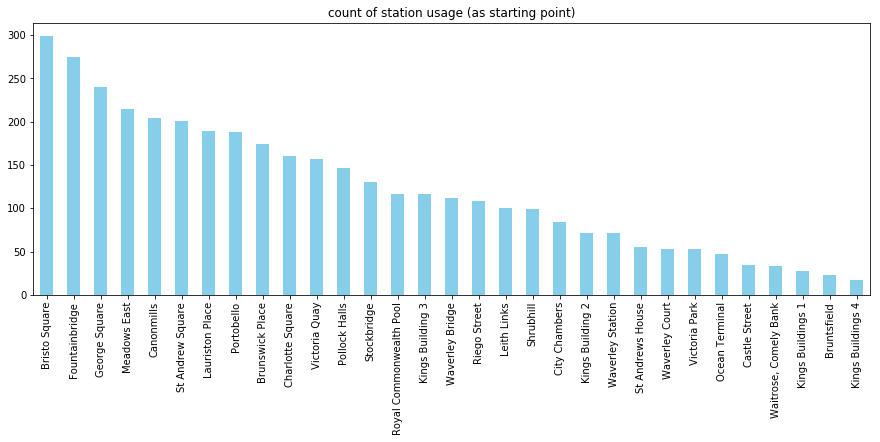

In [10]:
# Plot bar chart of count of station usage as starting point
bike_df.start_station_name.value_counts().plot.bar(
    figsize=(15,5),
    color='skyblue',
    title='count of station usage (as starting point)'
)

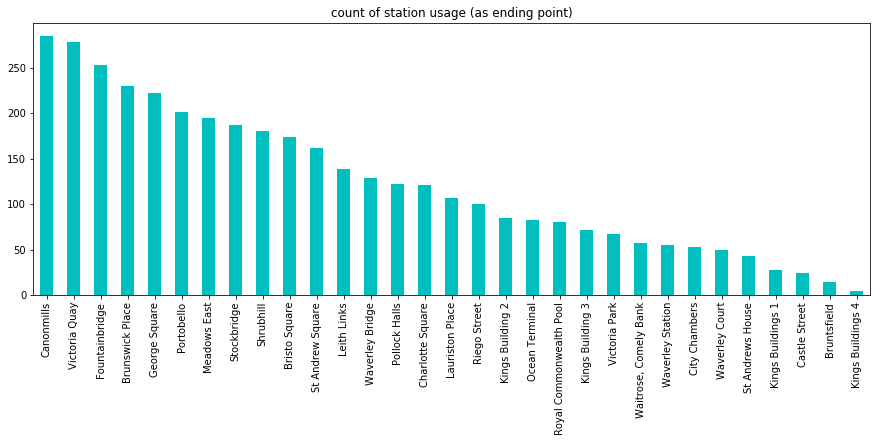

In [11]:
# Plot bar chart of count of station usage as ending point
bike_df.end_station_name.value_counts().plot.bar(
    figsize=(15,5),
    color='c',
    title='count of station usage (as ending point)',
)

#### Q3. What was the most common time(s) of day for journeys to be undertaken?

In [12]:
# Count the bike usage per hour on each day, sum up those counts number for each day
data = []
day = ["Monday",'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for j,i in enumerate(bike_df.started_at.dt.dayofweek.unique()):
    data.append(
        go.Bar(
            # How many hours in a day
            x=bike_df[bike_df.started_at.dt.dayofweek==i].started_at.dt.hour.value_counts().sort_index().index,
            # Counts of trips per hour in a day
            y=bike_df[bike_df.started_at.dt.dayofweek==i].started_at.dt.hour.value_counts().sort_index(),
            # legend
            name=day[j]
        )
    )

    
# Set the feature of the chart
layout = go.Layout(
    title='Count of trips per hour on each weekday',
    xaxis=dict(
        title='Time point of the day'
        ),
    yaxis=dict(
        title='Count of trips',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    barmode='group',
    bargap=0.25,
    bargroupgap=0.5
)

# Plot the graph
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar')

- We can select the day to be shown by clicking the right-hand-side legend.
- As shown in the chart, 16:00-17:00 is the most common time of day for journeys to be undertaken.
- 11:00-18:00 is the popular time interval of the day.

    I try to compare the difference of bike usage between different days. However, there are 5 Mondays and Tuesdays in October, and as for other days, there are only 4. In this case, as the above chart is an absolute count of the trips on each day, the outputs are not comparable between Monday/Tuesday with other days. So I also make a chart of average count on each week per day, which could be used to compare within the week.

In [13]:
# Count the bike usage per hour on each day, average those counts number for each day
data = []
day = ["Monday",'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for j,i in enumerate(bike_df.started_at.dt.dayofweek.unique()):
    data.append(
        go.Bar(
            # How many hours in a day
            x=bike_df[bike_df.started_at.dt.dayofweek==i].started_at.dt.hour.value_counts().sort_index().index,
            # Average the counts of trips per hour in a day
            y=(bike_df[bike_df.started_at.dt.dayofweek==i].started_at.dt.hour.value_counts()/
               len(bike_df[bike_df.started_at.dt.dayofweek==i].started_at.dt.day.value_counts())).sort_index(),
            # Legend
            name=day[j]
        )
    )


# Set the feature of the chart
layout = go.Layout(
    title='Average trips per hour on each day of the week',
    xaxis=dict(
        title='Time point of the day'
        ),
    yaxis=dict(
        title='Average trips',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    barmode='group',
    bargap=0.25,
    bargroupgap=0.5
)

# Plot the graph
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar')

- The peak time for workdays is 16:00-17:00, but as for weekends, peak time is 15:00-16:00.
- Concluded from the chart, for the 9:00-12:00 and 13:00-16:00 period, the average usage of bikes on weekends is greater than on workdays.
- On workdays, bike rental starts to become busy at 7:00. As for the weekends, the bike rental gets busy later than 9:00.
- Saturday is the busiest day of one week.

#### Q4. Can you process the geographic information (latitudes and longitudes of start and end stations), and display this in an interesting way?

- I use mapbox to creat a real map of the city of Edinburgh in this part. 
- Each trip is illustrates as a yellow line on the map, and each station is denoted by a blue node on the map.

In [14]:
# Extract the description of the stations
locations_name = bike_df.start_station_description

# add my mapbox access token
mapbox_access_token = 'pk.eyJ1IjoieWluZ2ppYSIsImEiOiJjam95a2gwZTIyY2kxM3dsaGNyMGczcWh5In0.fJzSzMjPKKWYMKu7ev8LRg'

In [15]:
# Fill the station location(latitude and logitude) and name
data = [
    go.Scattermapbox(
        # Latitude and Longitude of the stations
        lat = bike_df.start_station_latitude,
        lon = bike_df.start_station_longitude,
        mode = 'markers',
        marker = dict(
            size = 9,
            color = '#31abf6'
        ),
        text = locations_name,
    )
]

In [16]:
# Adjust the location data to the GoeJSON format coordinates, fill the datas into 'route'
start_lon = bike_df.start_station_longitude.values.tolist()
start_lat = bike_df.start_station_latitude.values.tolist()
end_lon = bike_df.end_station_longitude.values.tolist()
end_lat = bike_df.end_station_latitude.values.tolist()
route = [[[start_lon[i], start_lat[i]], [end_lon[i], end_lat[i]]] for i in range(len(start_lon))]

In [17]:
# Construct the GeoJSON type dict
the_geojson_type_dict = {
    "geometry": {
    "coordinates": route,
    "type": "MultiLineString"
  },
  "type": "Feature",
  "properties": {}
}

In [18]:
# Fill in the GeoJSON type dict to the layer
layers = [
    dict(sourcetype = 'geojson',
    source = the_geojson_type_dict,
    color = '#f6b131',
    type = 'line',
    line = dict(width=0.3),
   )
]  

In [19]:
# Set the size and the location of the layout map 
layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        layers=layers,
        bearing=0,
        center=dict(
            # This is the approximate location of Edinburgh Centre
            lat=55.945,
            lon=-3.185
        ),
        pitch=0,
        zoom=12
    ),
)

In [20]:
# Plot the map
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

#### Q5. Can you use the data to answer any other interesting questions about the bike trips?

**First, I try to figure out which is the busiest workday.**

In [21]:
# Calculate the average all day bike usage of each weekday
for i in range(7):
    y = (bike_df[bike_df.started_at.dt.dayofweek==i].started_at.dt.hour.value_counts()/
    len(bike_df[bike_df.started_at.dt.dayofweek==i].started_at.dt.day.value_counts())).sort_index()
    print(sum(y))

105.8
115.2
126.0
134.25
133.75
154.25
125.25


- Thus, Thursday is the busiest workday, it is slightly busier than Friday. Meanwhile, Saturday is the busiest day of the week.

**Next, I try to discover the which stations have largest demand on different days. I think this might be helpful for making decision about the allocation of number of bikes to different stations on different days.**

In [22]:
# Count the bike usage per station on each day, average those counts number for each day
data = []
day = ["Monday",'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for j,i in enumerate(bike_df.started_at.dt.dayofweek.unique()):
    data.append(
        go.Bar(
            # Count the usage of each station
            x=bike_df[bike_df.started_at.dt.dayofweek==i].start_station_name.value_counts().sort_index().index,
            # Average the counts for each day
            y=(bike_df[bike_df.started_at.dt.dayofweek==i].start_station_name.value_counts()/
               len(bike_df[bike_df.started_at.dt.dayofweek==i].started_at.dt.day.value_counts())).sort_index(),
            name=day[j]
        )
    )

# Set the feature of the chart
layout = go.Layout(
    title='Average usage of stations (starting point) on each day of the week',
    xaxis=dict(
        title='Bike Station',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Average number of trips',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    barmode='group',
    bargap=0.25,
    bargroupgap=0.5
)

# Plot the graph
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar')

- We can see some stations have significantly more demand on weekends than they do on workdays, such as Portobello and Victoria Quay. So we might consider to allocate more bikes to these stations on weekends.
- Bristo Square and Fountianbridge are still the overall most popular starting stations.

**I also wonder: where do people like to go during daytime and nighttime? I would like to discover where do people most likely to go between 9:00-17:00, 17:00-23:00 and 23:00-3:00 respectively.**

In [23]:
# Count the bike usage per station on each day, average those counts number for each day
data = []
day = ["Monday",'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for j,i in enumerate(bike_df.started_at.dt.dayofweek.unique()):
    # I would like to discover the bike usage between 9:00-17:00
    time_interval = (bike_df.ended_at.dt.dayofweek==i) & (bike_df.started_at.dt.hour>9) & (bike_df.started_at.dt.hour<17)
    data.append(
        go.Bar(
            # Count the usage of each station
            x=bike_df[time_interval].end_station_name.value_counts().sort_index().index,
            # Average the counts for each day
            y=(bike_df[time_interval].end_station_name.value_counts()/
               len(bike_df[time_interval].ended_at.dt.day.value_counts())).sort_index(),
            # Legend
            name=day[j]
        )
    )

    
# Set the feature of the chart
layout = go.Layout(
    title='Average count of destinations on each day of the week between 9:00-17:00',
    xaxis=dict(
        title='Bike Station',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Average number of trips',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    barmode='group',
    bargap=0.25,
    bargroupgap=0.5
)

# Plot the graph
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar')


- For daytime activity, we can see Portobello and Victoria Quay are two most popular places people would like to go on weekends.
- Also, Canonmills and Stockbridge and Leith Links are quite popular places to go on weekends.
- On workdays, people are mor likely to go to Canonmills and George Square.

Let's check the nighttime data.

In [24]:
# Count the bike usage per station on each day, average those counts number for each day
data = []
day = ["Monday",'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']


for j,i in enumerate(bike_df.started_at.dt.dayofweek.unique()):
    # I would like to discover the bike usage between 17:00-21:00
    time_interval = (bike_df.ended_at.dt.dayofweek==i) & (bike_df.started_at.dt.hour>17) & (bike_df.started_at.dt.hour<21)
    data.append(
        go.Bar(
            # Count the usage of each station
            x=bike_df[time_interval].end_station_name.value_counts().sort_index().index,
            # Average the counts for each day
            y=(bike_df[time_interval].end_station_name.value_counts()/
               len(bike_df[time_interval].ended_at.dt.day.value_counts())).sort_index(),
            # Legend
            name=day[j]
        )
    )

# Set the feature of the chart
layout = go.Layout(
    title='Average count of destinations on each day of the week between 17:00-21:00',
    xaxis=dict(
        title='Bike Station',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Average number of trips',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    barmode='group',
    bargap=0.25,
    bargroupgap=0.5
)


# Plot the graph
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar')

- We can see Fountainbridge, Shrubhill and Riego Street are the most popular places to go at night on weekends.
- Fountainbridge, Shrubhill are still popular on workday night, whereas Riego Street is not as popular as it is on weekends. Brunswick Place and Charlotte Square are quite popular for workday night.

Last, check the data for midnight, I suggest the time interval of 21:00-3:00.

In [25]:
# Count the bike usage per station on each day, average those counts number for each day
data = []
day = ["Monday",'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']


for j,i in enumerate(bike_df.started_at.dt.dayofweek.unique()):
    # I would like to discover the bike usage between 21:00-3:00
    time_interval = (bike_df.ended_at.dt.dayofweek==i) & (bike_df.started_at.dt.hour>21)|(bike_df.started_at.dt.hour<3)
    data.append(
        go.Bar(
            # Count the usage of each station
            x=bike_df[time_interval].end_station_name.value_counts().index,
            # Average the counts for each day
            y=(bike_df[time_interval].end_station_name.value_counts()/
               len(bike_df[time_interval].ended_at.dt.day.value_counts())).sort_index(),
            # Legend
            name=day[j]
        )
    )

# Set the feature of the chart
layout = go.Layout(
    title='Average count of destinations on each day of the week between 21:00-3:00',
    xaxis=dict(
        title='Bike Station',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Average number of trips',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    barmode='group',
    bargap=0.25,
    bargroupgap=0.5
)


# Plot the graph
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar')

- We can see Meadows East, Victoria Quay, Lauriston Place and Fountainbridge are the most popular places to go in midnight on weekends.
- Shrubhill, Meadows East, Pollock Halls and Brunswick Place are most popular places to go in midnight on workdays.

---

## Task 2 - Text data analysis

The second task concerns the text file `midsummer.txt` which contains the text of William Shakespeare's play *A Midsummer Night's Dream*. The play contains 5 acts, each with 2 scenes, and the task is to investigate them, and in particular to decide how positive or negative each scene is.

To that end, there are two more data files: `positive-words.txt` and `negative-words.txt`, which contain lists of positive and negative words respectively. These words come from the paper *Minqing Hu and Bing Liu. "Mining and summarizing customer reviews." Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery & Data Mining, Seattle, Washington, USA, Aug 22-25, 2004*. So whilst the words are not ideal for our purpose (since they are mainly to do with product review sentiments), they still represent an interesting way to examine our scenes.

- You should read in all three of the data files. You will need to split the play in 'midsummer.txt' up so that each scene can be considered individually.
- You need to invent a metric for how positive or negative a given scene is, based on how many of the words in it are in the positive/negative word lists. For instance, is a scene containing one positive and one negative word: overall positive, negative or neutral? - try and develop a single measure based on the word occurrences that will describe the positivity/negativity of the scene.
- Make a plot of the measure you have invented as a y-axis, with scene number as an x-axis.
- When a character starts speaking, their name appears in capitals, on its own line. Which character(s) speak most often?
- Can you use this data to answer any other questions about the data? For instance, could you compare different measures of positivity/negativity, or compare the pattern of positivity/negativity with that found in other plays? (You can find other texts on [the Project Gutenberg website](http://www.gutenberg.org/wiki/Main_Page).)

Note - this is a very simplistic way of doing this kind of text analysis, there are far more complex things that can be done, but I think even the basic approach is cool and can give quite interesting results.

Please include here all the code used to answer this question and generate any plots.

#### 1. You should read in all three of the data files. You will need to split the play in 'midsummer.txt' up so that each scene can be considered individually.

In [26]:
# Read in text files.
with open('midsummer.txt') as f1, open('positive-words.txt', encoding='latin-1') as f2, \
     open('negative-words.txt', encoding='latin-1') as f3:
    
    # Split the play
    midsummer = f1.read().split('SCENE')
    midsummer = ['SCENE'+i for i in midsummer[2:]]
    
    # Split the positive and negative words
    pos_word = f2.read().split(';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;')[2].split()
    neg_word = f3.read().split(';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;')[2].split()

#### 2. You need to invent a metric for how positive or negative a given scene is, based on how many of the words in it are in the positive/negative word lists. For instance, is a scene containing one positive and one negative word: overall positive, negative or neutral? - try and develop a single measure based on the word occurrences that will describe the positivity/negativity of the scene.

In [27]:
def PerDiff(data,pos_word,neg_word):
    '''
    This function is used to compute the difference bewteen the precentage of positive words and percentage of 
    negative words in one scene.
    '''
    # The percentage of positive words in such scene
    per_pos_word = sum([data.split().count(i) for i in pos_word])/len(data.split())
    
    # The percentage of negative words in such scene
    per_neg_word = sum([data.split().count(i) for i in neg_word])/len(data.split())                                                               
    
    # Return their difference
    diff = per_pos_word - per_neg_word
    
    return diff

My positivity/negativity metric is: if the percentage of postive words in the given scene is 0.5 percent more than the negative words in that scene, then this scene is positive, and vice versa. If their difference is bewteen 0.5 percent, then it is neutral.

Thus, according to this criteria, I make the following function:

In [28]:
def examine_scene(diff):
    '''
    - This function is used to examine if the scene in the given text is postive/negative/neutural.
    - if the percentage of postive words in a scene is 0.5 percent more than the negative words in that scene, 
    then this scene is positive, and vice versa.
    '''
    examine={}
    
    for i in range(len(diff)): 
        # Returen 'Negative' if %positive - %negative is less than -0.005
        if diff[i] < -0.005:
            examine[i] = 'Negative'
        elif diff[i] > 0.005:
            examine[i] = 'Positive'
        else :
            examine[i] = 'Neutral'
    
    return print(examine)

In [29]:
# These are the punctuation to be removed 
regex = re.compile('[' +re.escape(string.punctuation)+']')

# Drop the punctuation, turn the paragraphs into lowercase
midsummer_depunc = [(lambda x: regex.sub(" ", i).lower())(i) for i in midsummer]

In [30]:
# Count the number of Words, Positive Words and Negative Words in each scene
# not necessary here, I just want to check the exact number
for i in range(10):
    print(len(midsummer_depunc[i].split()),
          sum([midsummer_depunc[i].split().count(word) for word in pos_word]),
          sum([midsummer_depunc[i].split().count(word) for word in neg_word]))

2070 119 65
849 33 26
2245 80 86
1257 67 55
1645 72 39
3942 161 221
1859 89 51
389 16 6
2872 132 132
446 18 20


In [31]:
# Apply the PerFiff function to compute the difference of precentage of positive and negative words in each scene of midsumeer
diff = [PerDiff(i,pos_word,neg_word) for i in midsummer_depunc]
# Examine if a scene is Positive, Negative or Neutral
examine_scene(diff)

{0: 'Positive', 1: 'Positive', 2: 'Neutral', 3: 'Positive', 4: 'Positive', 5: 'Negative', 6: 'Positive', 7: 'Positive', 8: 'Neutral', 9: 'Neutral'}


Based on my metric, there are three neutral scenes, one negative scene and the rest are positive.

#### 3. Make a plot of the measure you have invented as a y-axis, with scene number as an x-axis.


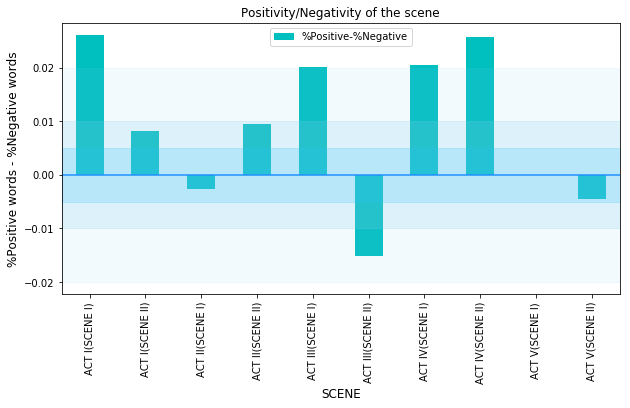

In [32]:
# Build a dataframe for the diff data
measure = pd.DataFrame(
    {'%Positive-%Negative':diff},
    index=['ACT I(SCENE I)','ACT I(SCENE II)','ACT II(SCENE I)','ACT II(SCENE II)',
           'ACT III(SCENE I)','ACT III(SCENE II)','ACT IV(SCENE I)','ACT IV(SCENE II)',
           'ACT V(SCENE I)','ACT V(SCENE II)']
)


# Plot the bat chart
measure.plot.bar(
    figsize=(10,5),
    title='Positivity/Negativity of the scene',
    color='c'
)
plt.xlabel('SCENE', fontsize='12')
plt.ylabel('%Positive words - %Negative words', fontsize='12')
plt.axhline(y=0, color='dodgerblue', linestyle='-')


# Set the shaded area as borders of different criteria of neutural
# Difference within 0.5% to be netural
plt.axhspan(-0.005, 0.005, alpha=0.2, color='deepskyblue')
# Difference within 1% to be netural
plt.axhspan(-0.01, 0.01, alpha=0.2, color='skyblue')
# Difference within 2% to be netural
plt.axhspan(-0.02, 0.02, alpha=0.1, color='lightskyblue')

The shaded areas are the neutral borders. I make different shade areas with three different colors, they represent different criteria of the positivity/negativity. For example, if one bar lies in the central shade area, it means this scene has less than 0.5% of the difference between %(positive words) and %(negative words). Other borders denote 1% of difference and 2% of difference respectively. 

From the above bar chart, we can see that most scenes in *midsummer* are significantly positive, the SCENE II in ACT III is the most negative one, ACT V(SCENE I), ACT II(SCENE I) and ACT V(SCENE I) are relatively neutral.

#### 4. When a character starts speaking, their name appears in capitals, on its own line. Which character(s) speak most often?

In [33]:
# Link all the paragraphs
midsummer_all = ' '.join(midsummer)


# Find all the sentences whthin the square brackets
attendance = re.findall(r"[^[]*\[([^]]*)\]", midsummer_all)
# Link them altogether
attendance = ' '.join(attendance)
# Remove the punctuations
attendance = regex.sub(" ", attendance)


# Find all the characters attend
people = set([i for i in attendance.split() if i.isupper() and len(i)>1])


# Remove all the sentences whthin the square brackets
midsummer_all = re.sub(r"\[.+", "", midsummer_all)
midsummer_all = re.sub(r".+\]", "", midsummer_all)


# Count the times of each character speaks
speaker = pd.DataFrame([(i,midsummer_all.count(i)) for i in people],columns=['Character','Times'])
# Sort the speakers
speaker.sort_values('Times',ascending=False)

,Character,Times
28,LYSANDER,51
26,THESEUS,50
14,DEMETRIUS,48
24,HERMIA,48
19,BOTTOM,47
20,QUINCE,39
18,HELENA,36
16,PUCK,33
4,OBERON,29
22,TITANIA,23


Hence, LYSANDER speaks most often.

#### 5.Can you use this data to answer any other questions about the data? For instance, could you compare different measures of positivity/negativity, or compare the pattern of positivity/negativity with that found in other plays? (You can find other texts on [the Project Gutenberg website](http://www.gutenberg.org/wiki/Main_Page).)

In this part, I want to discover the difference between the patterns of positivity/negativity between William Shakespeare's works. 

In addition to *A Midsummer Night's Dream*, I selected nine other plays by William Shakespeare. They are:

- Comedies: *The Merchant of Venice*, *As You Like It*, *Twelfth Night* and *The Taming of the Shrew* 
- Tragedies: *Hamlet*, *King Lear*, *Macbeth* and *Othello*
- Other: *Romeo and Juliet*


Again, my positivity/negativity metric is: if the percentage of positive words in the given scene is 0.5 percent more than the negative words in that scene, then this scene is positive, and vice versa. If their difference is between 0.5 percent, then it is neutral.

I would also make different shade areas with three different colors on the plot graphs, to represent different criteria of the positivity/negativity (difference of 0.5%, 1% and 2%). For example, if one bar lies in the 0.5% shade area, it means this scene has less than 0.5% of the difference between %(positive words) and %(negative words). Other borders are 1% of difference and 2% of difference respectively. 

In [34]:
def read_text_cap(txt_file):
    '''
    This function is used to read in the text file and split the text into several scenes.
    Made for text files with capital title - 'SCENE'
    '''
    with open(txt_file) as f1:
        # Split the play in text
        text = f1.read().split('SCENE')
        text = ['SCENE'+i for i in text[2:]]
        return text

In [35]:
def read_text_low(txt_file):
    '''
    This function is used to read in the text file and split the text into several scenes.
    Made for text files with lowercase title - 'Scene'
    '''
    with open(txt_file) as f1:
        # Split the play in text
        text = f1.read().split('Scene')
        text = ['Scene'+i for i in text[2:]]
        return text      

In [36]:
def plot_graph(text):
    '''
    This function is used to plot the positivity/negativity graph
    '''

    # These are the punctuation to be removed 
    regex = re.compile('[' +re.escape(string.punctuation)+']')
    # Drop the punctuation, turn the paragraphs into lowercase
    text_depunc = [(lambda x: regex.sub(" ", i).lower())(i) for i in text]
    
    # Find the scenes
    seq_scene = [item[0:9] for item in text]
    # Remove the punctuation
    seq_scene = [''.join(c for c in s if c not in string.punctuation) for s in seq_scene]

    # Apply the PerDiff function to compute the difference of precentage of positive and negative words in each scene
    diff = [PerDiff(i,pos_word,neg_word) for i in text_depunc]
    # Build a dataframe for the diff data
    measure = pd.DataFrame(
        {'%Positive-%Negative':diff},
        index = seq_scene
    )

    # Plot the bat chart
    measure.plot.bar(
        figsize=(12,5),
        title='Positivity/Negativity of the scene',
        color='c'
    )
    plt.xlabel('SCENE', fontsize='12')
    plt.ylabel('%Positive words - %Negative words', fontsize='12')
    plt.axhline(y=0, color='dodgerblue', linestyle='-')
    
    # Set the shaded area for netural border
    # Difference within 0.5% to be netural
    plt.axhspan(-0.005, 0.005, alpha=0.15, color='deepskyblue')
    # Difference within 1% to be netural
    plt.axhspan(-0.01, 0.01, alpha=0.15, color='skyblue')
    # Difference within 2% to be netural
    plt.axhspan(-0.02, 0.02, alpha=0.1, color='lightskyblue')

#### Part I : William Shakespeare's comedies

 **1. A Midsummer Night's Dream**

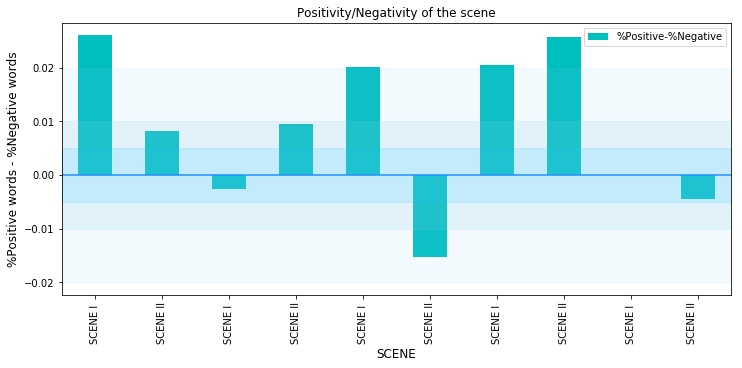

In [37]:
# Plot the graph of midsummer again
plot_graph(read_text_cap('midsummer.txt'))

**2. The Merchant of Venice**

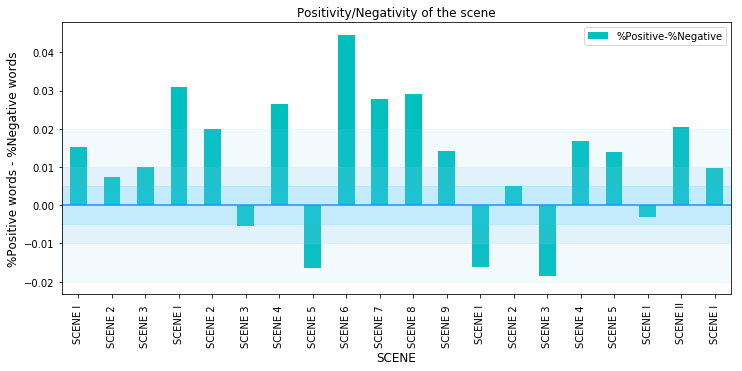

In [38]:
# Plot the graph of the merchant of venice
plot_graph(read_text_cap('venice.txt'))

**3. As You Like It**

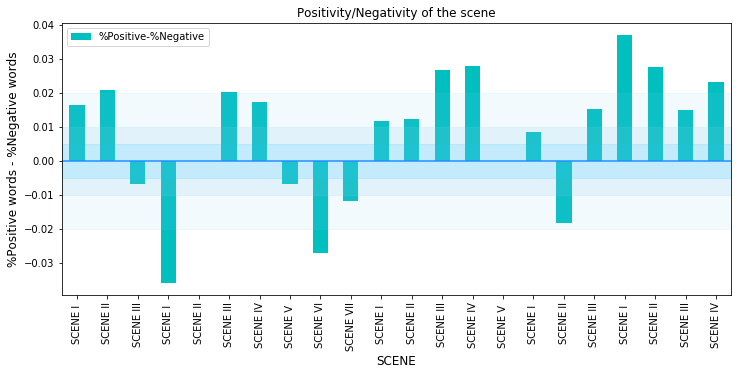

In [39]:
# Plot the graph of as you like it 
plot_graph(read_text_cap('asyoulike.txt'))

**4. Twelfth Night**

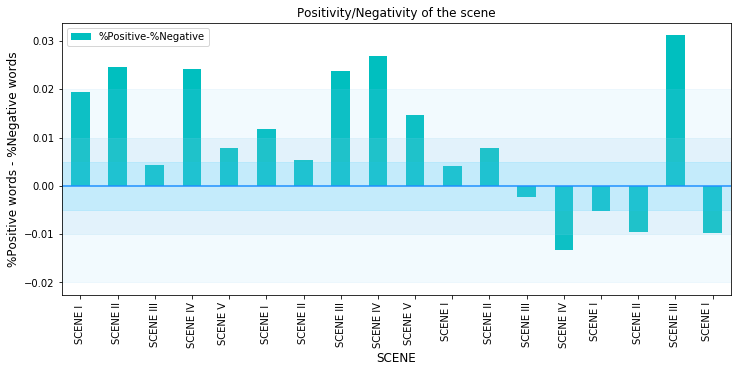

In [40]:
# Plot the graph of twelfth night
plot_graph(read_text_cap('twelfthnight.txt'))

**5. The Taming of the Shrew**

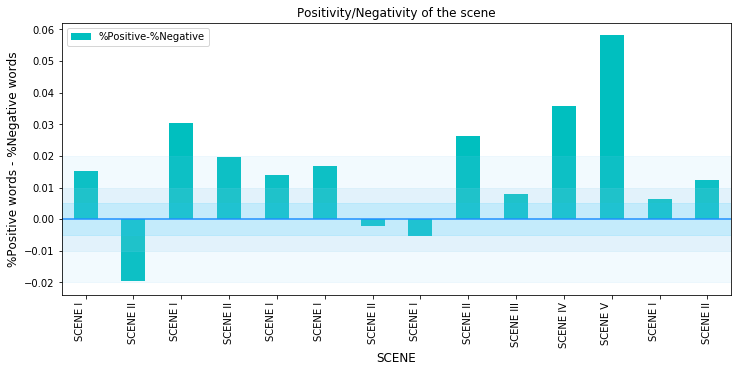

In [41]:
# Plot the graph of the taming of the shrew
plot_graph(read_text_cap('taming.txt'))

- We can see that most of the scenes in these comedies are positive. In the meantime, they are more or less interspersed with some negative scenes. 
- **The Merchant of Venice**, **As You Like It** and **The Taming of the Shrew** have a very similar pattern of the positivity/negativity: the overall play tend to be positive, with several scenes indicate very strong positivity, and with few scenes indicate strong negativity. The ending part of these plays usually has strong positivity.
- The pattern of **Twelfth Night** is very interesting. As we can see, there is no negative scene in the front half of the play, and this positivity maintains for a long time, it keeps until the back half of the ACT III. Then the play turns to a rather negative tune, but this negativity is not very strong. What attracts me is that the most positive scene in the play suddenly appears between those neutral-negative scenes, just before the play ends.

#### Part II: William Shakespeare's tragedies

**1. Hamlet**

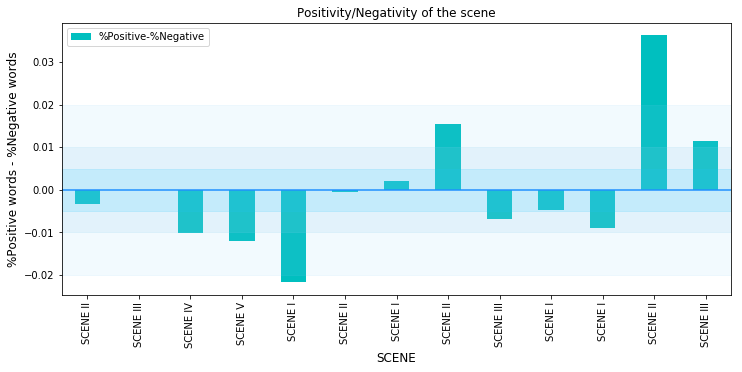

In [42]:
# Plot the graph of hamlet
plot_graph(read_text_cap('hamlet.txt'))

**2. King Lear**

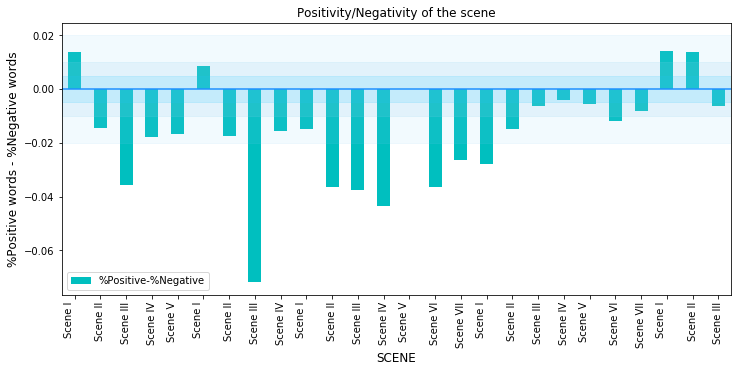

In [43]:
# Plot the graph of king lear
plot_graph(read_text_low('kinglear.txt'))

**3. Macbeth**

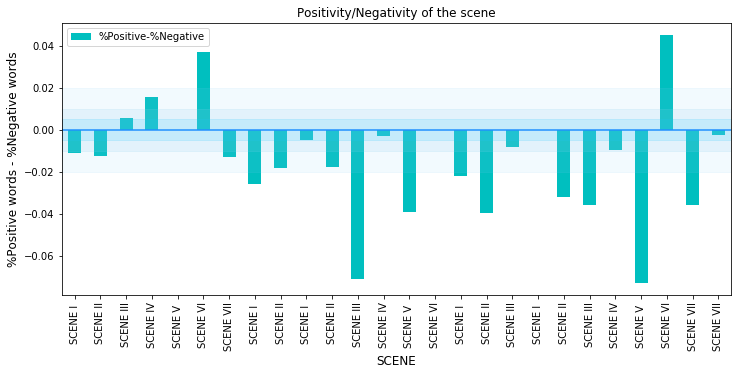

In [44]:
# Plot the graph of macbeth
plot_graph(read_text_cap('macbeth.txt'))

**4. Othello**

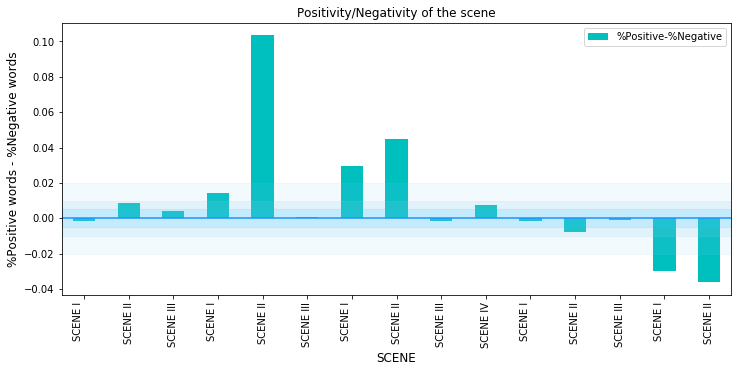

In [45]:
# Plot the graph of othello
plot_graph(read_text_cap('othello.txt'))

- These are William Shakespeare's most well-known tragedies. We can clearly see the difference of the positivity/negativity pattern between tragedies and comedies. There is a limit number of positive scenes in these tragedies, the typical play is **King Lear**, almost the whole play is in a strongly negative tune.
- In these four tragedies, **King Lear** and **Macbeth** are obviously more negative. The negativity of **King Lear** is even stronger than **Macbeth**, because it doesn't have any scene with strong positivity at all while **Macbeth** has at least two scenes showing strong positivity.
- **Othello** has a distinct pattern compared with other Shakespeare tragedies, most of its scenes have a neutral tune, especially, the 2nd SCENE in ACT II is significantly positive. The ending part of **Othello** is the most negative part of this play. This might be where the tragic stories are told.
- It is also interesting to see that **Hamlet** is the only one among these four tragedies which has a positive ending part and ends with a relatively strong positivity.

#### Part III: Other masterpiece by William Shakespeare

I'm also interested in the story of *Romeo and Juliet*, so I analyze this story here as well. 

On Wikipedia, *Romeo and Juliet* is labeled as a tragedy, but I don't regard it as a typical tragedy (although the hero's ending is tragic), it's more like a tragicomedy, which blends aspects of both tragic and comic, so I put it in an extra part to discuss.

** Romeo and Juliet **

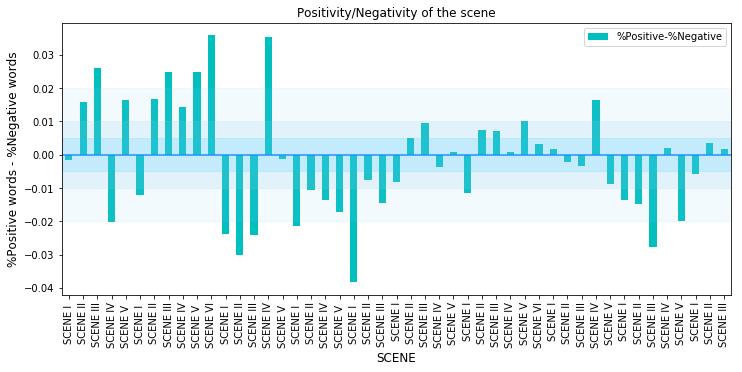

In [46]:
# Plot the graph of romeo and juliet
plot_graph(read_text_cap('romeojuliet.txt'))

As we can see, the story of ** Romeo and Juliet ** is obviously more convoluted than any of the previous plays I have analyzed. Especially in the front half of the story, the direction of the scene twists and turns a lot. In the back half of the story, the tune is softened, there is no more significantly positive scenes. The ending part shows negativity starts from ACT VIII.

Through text analysis, we can see that the tragic color of this story is more intense.